# Optimization

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
# Define the cities and their coordinates (x, y)
cities = {
    'A': (0, 0),
    'B': (2, 4),
    'C': (4, 2),
    'D': (6, 5)
}
num_cities = len(cities)

In [ ]:
#now plot the city locations
fig,ax = plt.subplots(1,1)
plt.scatter([x for x, y in cities.values()], [y for x, y in cities.values()])
ax.text(0, 0.25, 'A');ax.text(2, 4.25, 'B');ax.text(4, 2.25, 'C');ax.text(6, 4.75, 'D');ax.text(7, 2.75, 'E')
plt.xlabel('x');plt.ylabel('y')
plt.show()

In [ ]:
# Function to calculate the Euclidean distance between two cities
def calculate_distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

# Objective function for minimization
def objective_function(tour_order):
    tour_order = tour_order.astype(int)
    total_distance = 0
    startcity = list(cities.keys())[tour_order[0]]
    for i in range(num_cities - 1):
        city1 = list(cities.keys())[tour_order[i]]
        city2 = list(cities.keys())[tour_order[i + 1]]
        total_distance += calculate_distance(city1, city2)
    total_distance += calculate_distance(city2, startcity)  # Return to the starting city

In [ ]:
def constraint_fun(solution):
    constrain= []
    # Check that each city is visited only once.
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            if solution[i] == solution[j]:
                constrain.append(1)
            else:
                constrain.append(0)

    return (sum(constrain), sum(solution) - 6)

In [ ]:
# Define the bounds for the decision variables
bounds = [(0, num_cities - 1) for _ in range(num_cities)]

# Create a constraints dictionary for use in minimize
cons = {'type': 'eq', 'fun': constraint_fun}

# Initial guess (starting tour order)
initial_tour_order = np.array([1,2,0,3])

In [ ]:
# Solve the TSP using scipy.optimize.minimize
minimize(objective_function, initial_tour_order, bounds=bounds, method='SLSQP')

In [ ]:
# Get the optimal tour order
optimal_tour_order = result.x.astype(int)

# Calculate the optimal tour distance
optimal_distance = result.fun

# Reorder the cities based on the optimal tour order
optimal_tour = [list(cities.keys())[i] for i in optimal_tour_order]

# Output the optimal tour and distance
print("Optimal Tour:", " -> ".join(optimal_tour))
print("Optimal Distance:", optimal_distance)

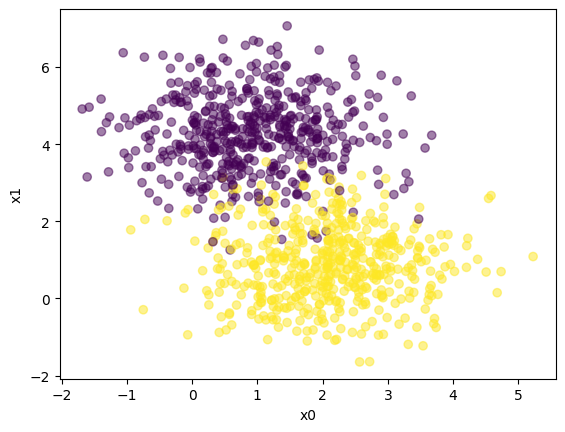

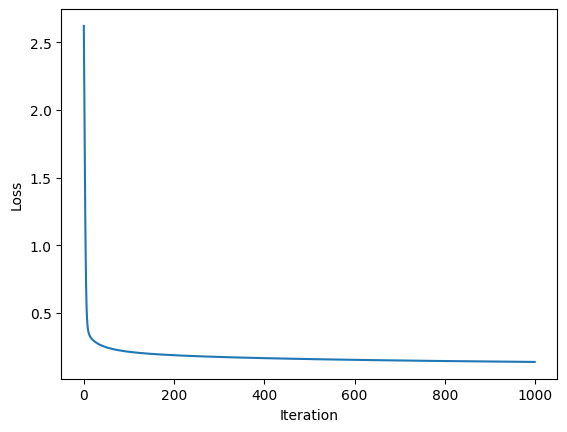

Accuracy: 0.9454545454545454


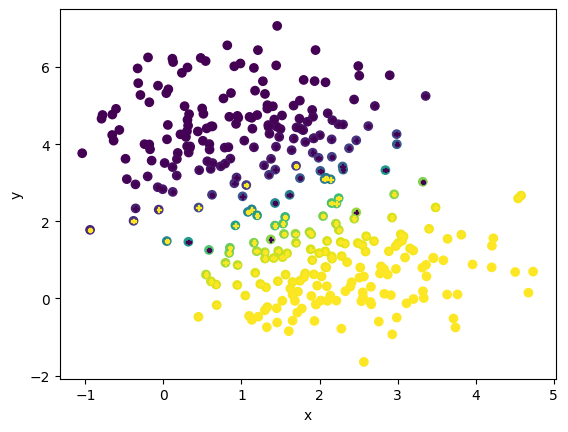

In [8]:
#This code is a simple example of a nueral network
# Path: 21c-NeuralNetwork.ipynb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate a dataset and plot it
np.random.seed(0)
X, y = make_blobs(n_samples=1000, centers=2)
fig,ax = plt.subplots(1,1)
ax.scatter(X[:,0], X[:,1], c=y,alpha=0.5)
plt.xlabel('x0');plt.ylabel('x1')
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Define the neural network architecture

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) #np.array([max(0,each) for each in z]) which is relu

# Define the loss function
def loss(y, y_hat):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)).mean() #np.sum((y-y_hat)**2)#

# Define the forward propagation
def forward_propagation(x, w, b):
    return sigmoid(np.matmul(x, w) + b)

# Define the backward propagation
def backward_propagation(x, y, y_hat):
    return np.matmul(x.T, (y_hat - y)) / y_hat.shape[0], np.mean(y_hat - y)

# Define the training loop
def train(X, y, learning_rate, iters):
    # Initialize the parameters
    w = np.ones(X.shape[1])
    b = 0
    losses = []
    for i in range(iters):
        # Forward propagation
        y_hat = forward_propagation(X, w, b)
        # Backward propagation
        dw, db = backward_propagation(X, y, y_hat)
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        # Calculate loss
        losses.append(loss(y, y_hat))
    return w, b, losses

# Train the model
w, b, losses = train(X_train, y_train, 0.1, 1000)

# Plot the loss curve
fig,ax = plt.subplots(1,1)
ax.plot(losses)
plt.xlabel('Iteration');plt.ylabel('Loss')
plt.show()

# Define the predict function
def predict(X, w, b):
    return forward_propagation(X, w, b)

# Predict on the test set
y_pred = predict(X_test, w, b)

# Calculate the accuracy
accuracy = np.mean(y_pred.round() == y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary
fig,ax = plt.subplots(1,1)
ax.scatter(X_test[:,0], X_test[:,1], c=y_pred)
ax.scatter(X_test[:,0], X_test[:,1], s=10, c=y_test, marker="P")
plt.xlabel('x');plt.ylabel('y')
plt.show()

#This code is a simple example of a nueral network

In [5]:
w,b

(array([ 1.38209755, -1.85683344]), 2.464299200765141)

In [10]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize the neural network architecture
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.1

# Initialize weights and biases
input_layer = np.random.rand(input_size, 1)
hidden_layer_weights = np.random.rand(input_size, hidden_size)
hidden_layer_bias = np.random.rand(1, hidden_size)
output_layer_weights = np.random.rand(hidden_size, output_size)
output_layer_bias = np.random.rand(1, output_size)

# Sample input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Corresponding target data
y = np.array([[0], [1], [1], [0]])

# Training loop
epochs = 10000
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, hidden_layer_weights) + hidden_layer_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_layer_weights) + output_layer_bias
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the loss
    loss = 0.5 * np.mean((y - output_layer_output) ** 2)

    # Backpropagation
    d_output = (y - output_layer_output) * sigmoid_derivative(output_layer_output)
    d_hidden = d_output.dot(output_layer_weights.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    output_layer_weights += hidden_layer_output.T.dot(d_output) * learning_rate
    output_layer_bias += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    hidden_layer_weights += X.T.dot(d_hidden) * learning_rate
    hidden_layer_bias += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}: Loss {loss}')

# Print the final predictions
final_predictions = output_layer_output
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {final_predictions[i]}")

Epoch 0: Loss 0.1676768296300326
Epoch 1000: Loss 0.11847158839028199
Epoch 2000: Loss 0.0974566507207803
Epoch 3000: Loss 0.0740089517739545
Epoch 4000: Loss 0.02156696325278639
Epoch 5000: Loss 0.007507287436516607
Epoch 6000: Loss 0.004118474157960643
Epoch 7000: Loss 0.0027544246973760966
Epoch 8000: Loss 0.0020421072420632753
Epoch 9000: Loss 0.0016110497809955966
Input: [0 0], Predicted Output: [0.05391764]
Input: [0 1], Predicted Output: [0.95062808]
Input: [1 0], Predicted Output: [0.9507009]
Input: [1 1], Predicted Output: [0.05313195]


In [11]:
hidden_layer_weights

array([[5.9149746 , 3.74818997],
       [5.88987791, 3.74328878]])